<a href="https://colab.research.google.com/github/ShreedarshM/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#<b> Data Preprocessing

In [1]:
#Importing necessary libraries to perform the analysis
import numpy as np
import pandas as pd

In [2]:
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding='unicode_escape')

In [5]:
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
dataset.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [10]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
numerical_features = dataset.describe().columns
dist_column = list(numerical_features)
dist_column

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [12]:
dataset.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

###<b> Distribution of Various features in dataset

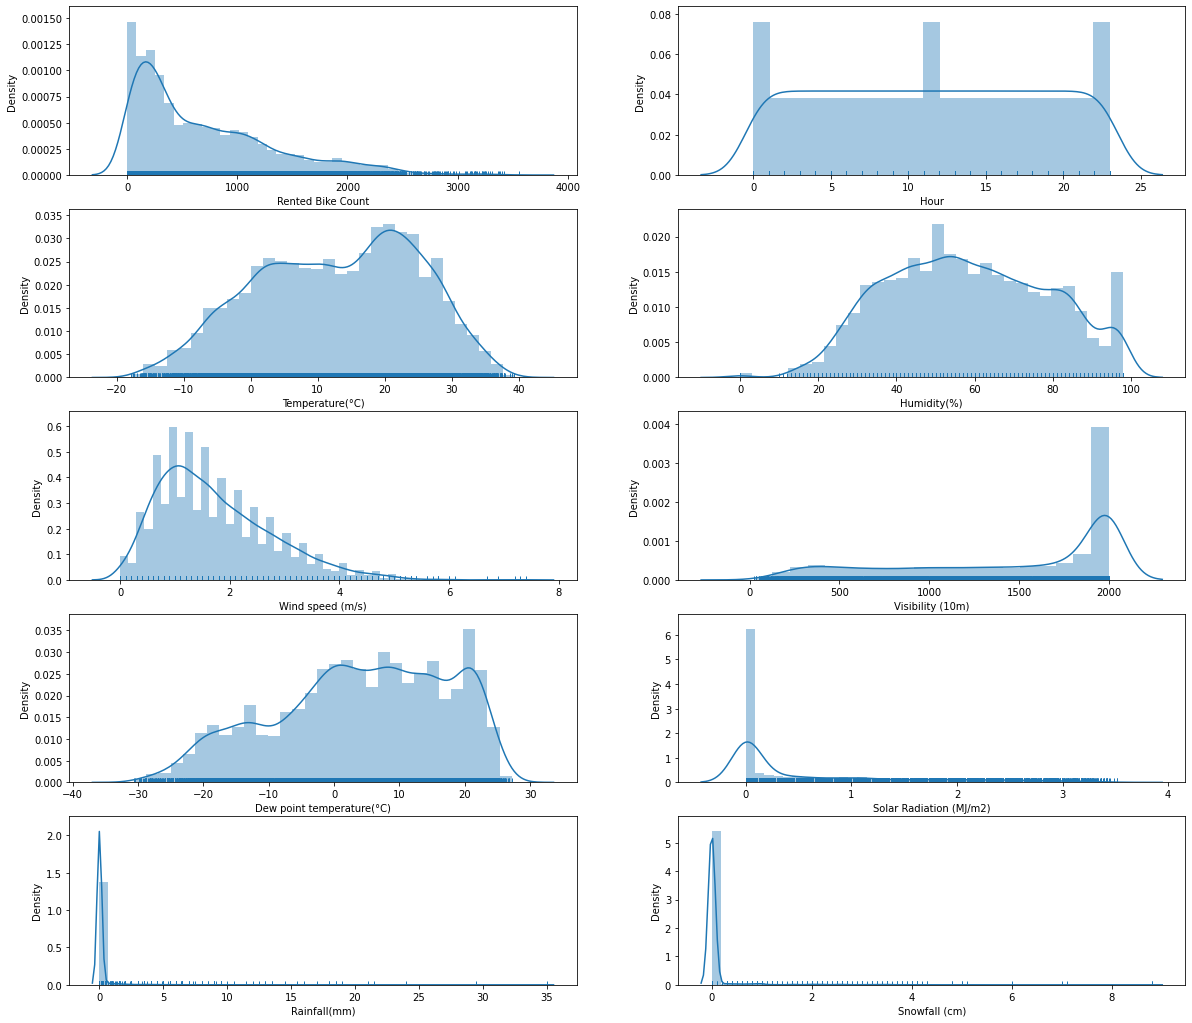

In [13]:
#Distributions of various feutures in the dataset
plt.figure(figsize=(20,18))
for i in range(len(dist_column)):
  plt.subplot(5,2,i+1)
  sns.distplot(dataset[dist_column[i]],hist=True,rug=True)

In [14]:
# Extraction of month and year
frame = pd.to_datetime(dataset['Date'],dayfirst=True)
dataset['month'] = frame.dt.month
dataset['year'] = frame.dt.year

###<b> Number of bikes rented at different months

Text(0.5, 1.0, 'Number of bikes rented at different months')

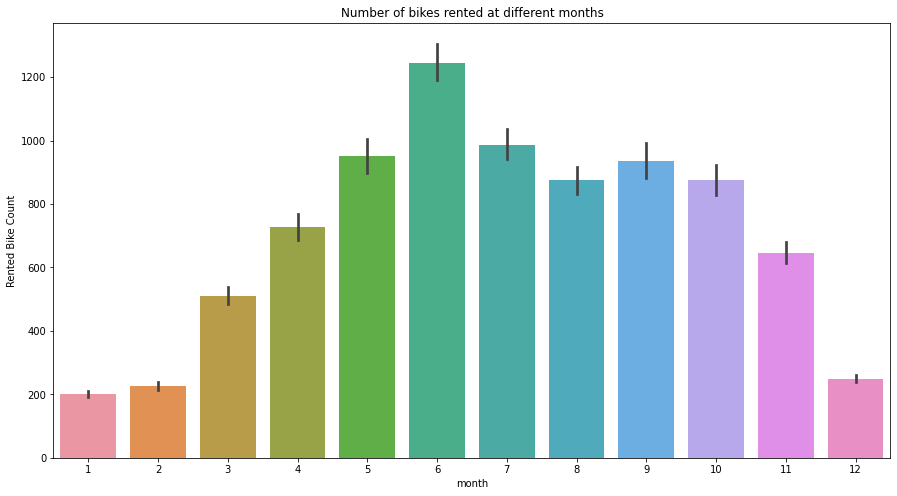

In [15]:
#Plotting number of Bikes rented at different months
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count', data = dataset)
plt.title('Number of bikes rented at different months')


###<b> Number of Bikes rented across different seasons

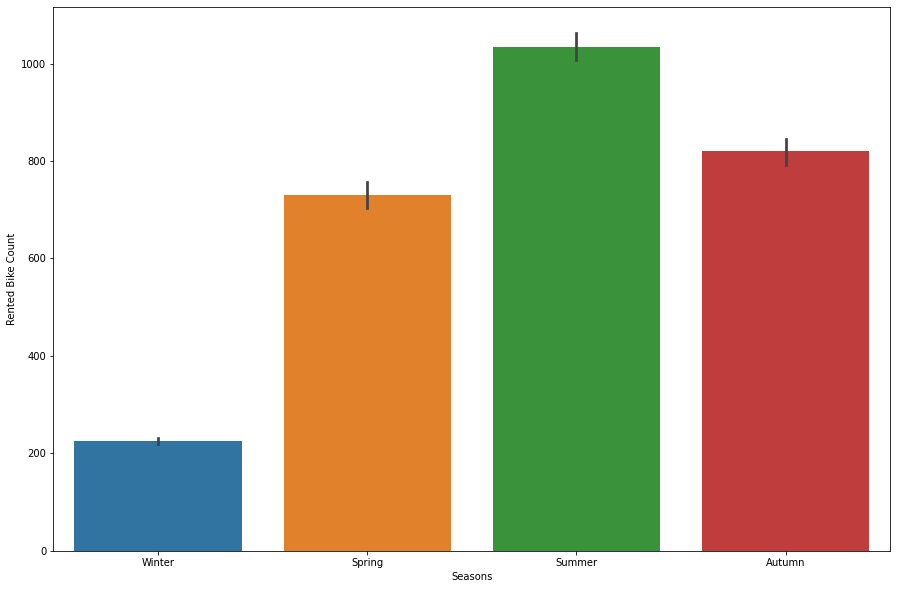

In [16]:
#Number of bikes rented across different seasons
plt.figure(figsize=(15,10))
sns.barplot(x='Seasons',y='Rented Bike Count', data=dataset)


###<b> Bike counts on funtional and non funtional day

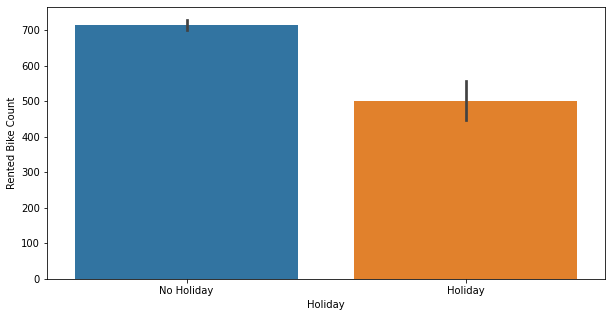

In [17]:
#Bike rent counts on Functioning day and non funtioning day
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count', data=dataset)

###<b> Bike counts across different hours in a day

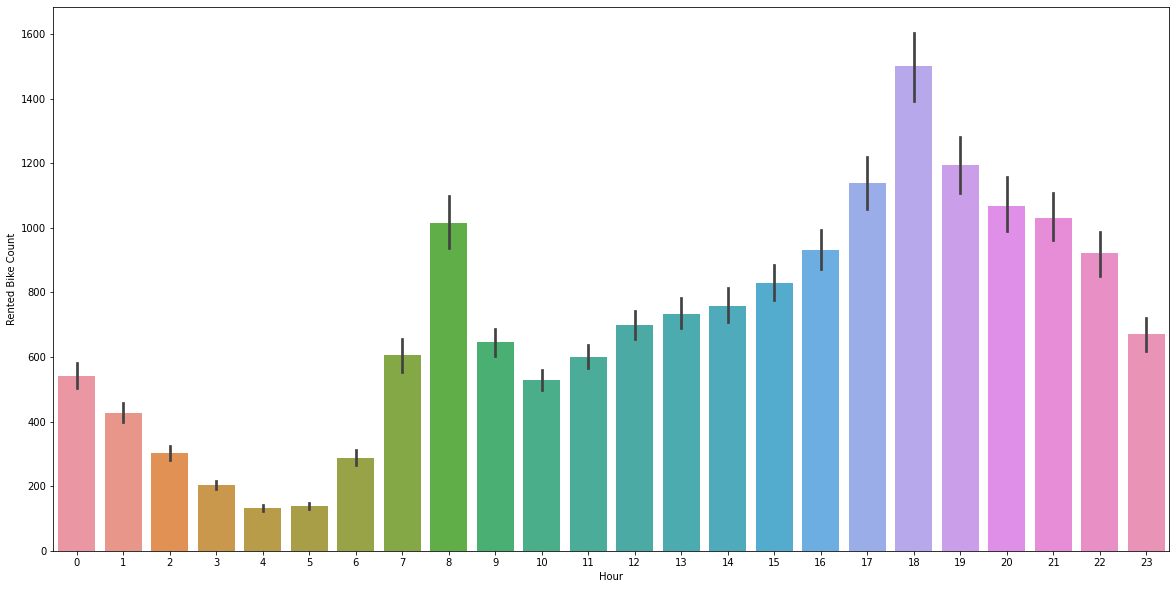

In [18]:
#Bike rent counts across different hours in a day
plt.figure(figsize=(20,10))
sns.barplot(x='Hour',y='Rented Bike Count', data=dataset)

###<b> Temperature impact on bike renting

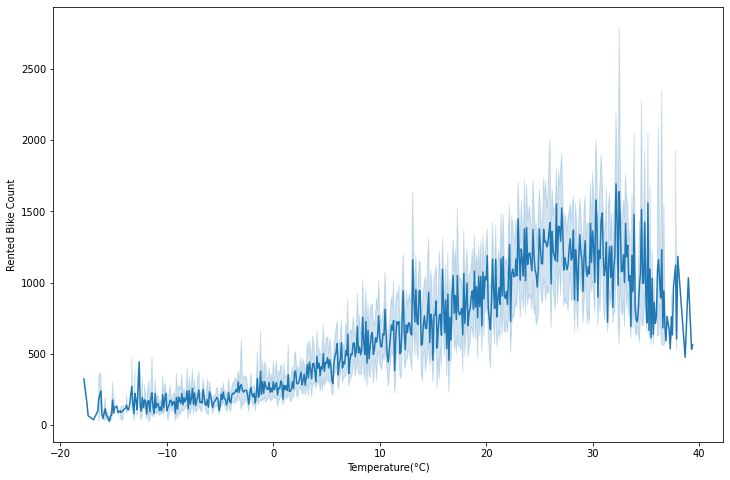

In [19]:
#Looking wether temparature impacts rent count
plt.figure(figsize=(12,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count', data=dataset)

###<b> Dew point temperature impact on bike renting

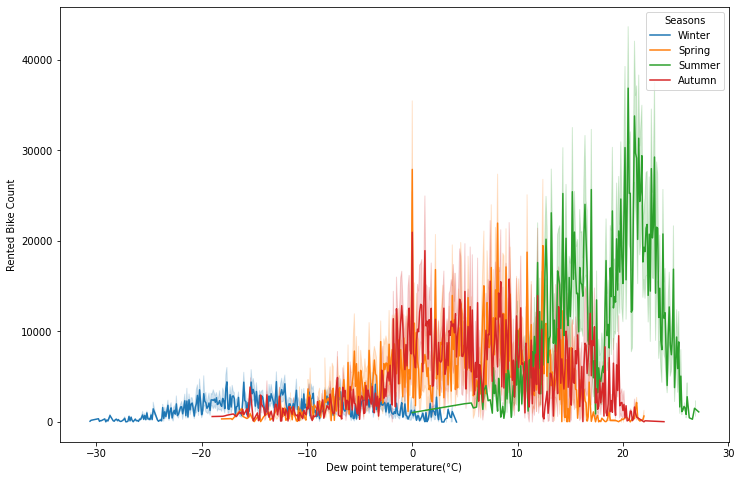

In [20]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count', data=dataset, estimator = 'sum',hue='Seasons',)

#<b>Checking for Outliers

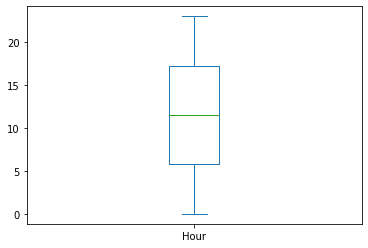

In [21]:
dataset['Hour'].plot.box()

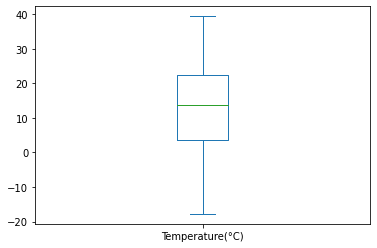

In [22]:
dataset['Temperature(°C)'].plot.box()

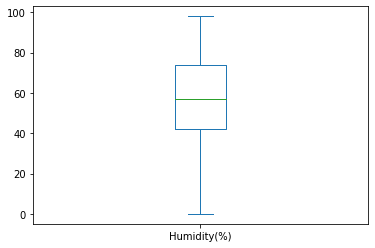

In [23]:
dataset['Humidity(%)'].plot.box()

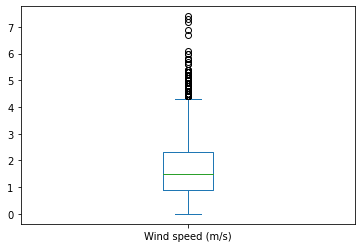

In [24]:
dataset['Wind speed (m/s)'].plot.box()

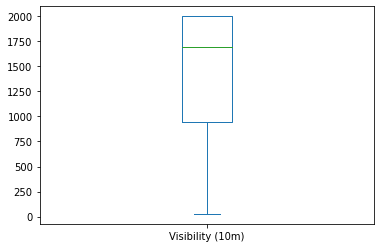

In [25]:
dataset['Visibility (10m)'].plot.box()

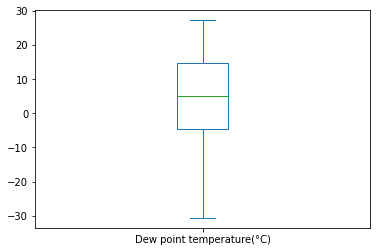

In [26]:
dataset['Dew point temperature(°C)'].plot.box()

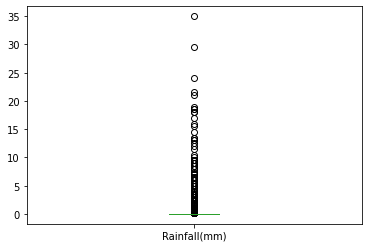

In [27]:
dataset['Rainfall(mm)'].plot.box()

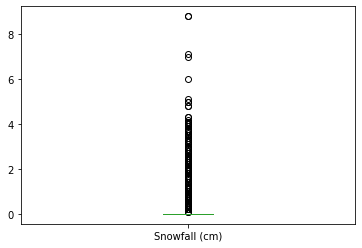

In [28]:
dataset['Snowfall (cm)'].plot.box()

<b> As we have seen there is a high rate of skewness present in the distribution of Snowfall and Rainfall, we would scale the data using log transformation

In [29]:
#Outlier treatment
dataset['Rainfall(mm)']=np.log10(dataset['Rainfall(mm)']+1)
dataset['Snowfall (cm)']=np.log10(dataset['Snowfall (cm)']+1)

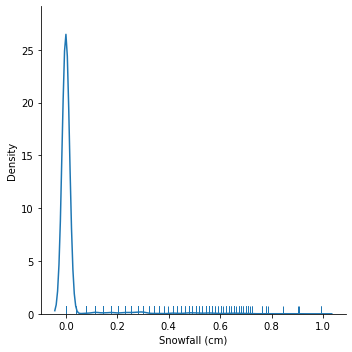

In [30]:
sns.displot(dataset['Snowfall (cm)'], kind='kde', rug=True)

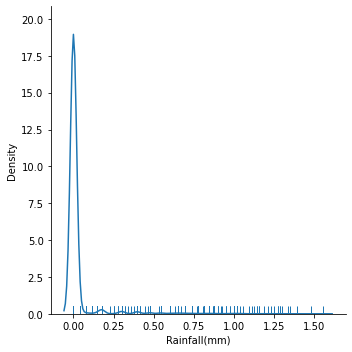

In [31]:
sns.displot(dataset['Rainfall(mm)'], kind='kde', rug=True)

In [32]:
dataset['Rainfall(mm)'].fillna(0,inplace = True)
dataset['Snowfall (cm)'].fillna(0,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [33]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [34]:
dataset.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [35]:
dataset.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [36]:
dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
newdf = dataset.drop(['Rented Bike Count', 'Date'], axis =1)

#<b> Label Encoding

In [38]:
newdf['Holiday']=newdf['Holiday'].apply(lambda x : 0 if x=='No Holiday' else 1)
newdf['Functioning Day']= newdf['Functioning Day'].apply(lambda x : 0 if x=='No' else 1)

In [39]:
#Label encoding for seasons
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
newdf['Seasons'] = label.fit_transform(newdf['Seasons'])

In [40]:
newdf

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,12,2017
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,11,2018
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,11,2018
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,11,2018
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,11,2018


In [41]:
newdf['Date'] = dataset['Date']
newdf['Rented Bike Count'] = dataset['Rented Bike Count']


In [42]:
newdf.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Date,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,12,2017,01/12/2017,78


##<b> Correlation Heatmap of Features

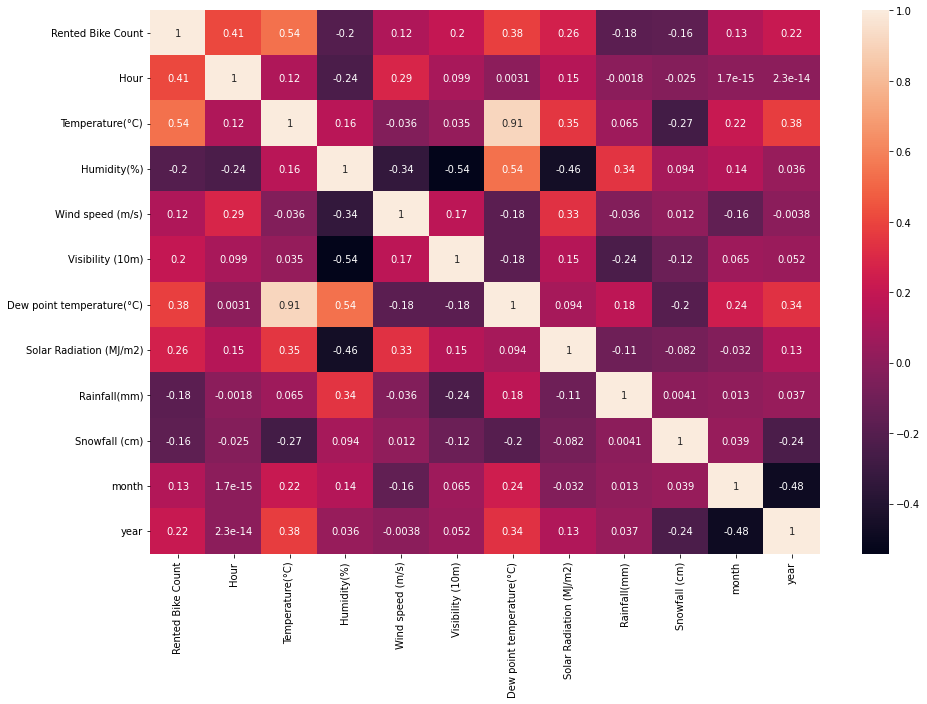

In [43]:
plt.figure(figsize=(15,10))
correlation= dataset.corr()
sns.heatmap(correlation, annot=True)

In [44]:
#Dropping 'Due point Temperature column as it has high rate of multicolleniarity
newdf.drop(['Dew point temperature(°C)'], axis=1, inplace=True)

##<b> Modelling

In [45]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [46]:
newdf.drop(['Date','month','year'],axis=1, inplace=True)

In [47]:
newdf.iloc[:,-1:]

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


In [48]:
X=newdf.iloc[:,0:-1].values
y=newdf.iloc[:,-1:].values

In [49]:
X

array([[ 0. , -5.2, 37. , ...,  3. ,  0. ,  1. ],
       [ 1. , -5.5, 38. , ...,  3. ,  0. ,  1. ],
       [ 2. , -6. , 39. , ...,  3. ,  0. ,  1. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [50]:
y

array([[254],
       [204],
       [173],
       ...,
       [694],
       [712],
       [584]])

In [51]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 11)
(1752, 11)
(7008, 1)
(1752, 1)


In [52]:
#Linear Regression Model
reg = LinearRegression().fit(X_train,y_train)

In [53]:
reg.coef_,reg.intercept_

(array([[ 2.73622205e+01,  2.94535590e+01, -6.50493831e+00,
          2.05158809e+01,  2.52599859e-02, -8.15362074e+01,
         -8.55960989e+02,  1.55176327e+02, -9.74538663e+01,
         -1.20902651e+02,  9.40765121e+02]]), array([-372.1197669]))

In [54]:
y_pred_train = reg.predict(X_train)

In [55]:
y_pred = reg.predict(X_test)

##<b> Regression Evaluation Metrics

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE = mean_squared_error(y_test,y_pred)
print('MSE:',MSE)
MAE = mean_absolute_error(y_test,y_pred)
print('MAE:', MAE)
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

MSE: 186894.84303042034
MAE: 322.5932226612304
RMSE: 432.31336207711684


In [57]:
r2_line_train = r2_score(y_train,y_pred_train)*100
r2_line_train

56.22156020285025

In [58]:
r2 = r2_score(y_test,y_pred)*100
print("R2:", r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

R2: 55.344144333848064
Adjusted R2 :  0.5506183720032642


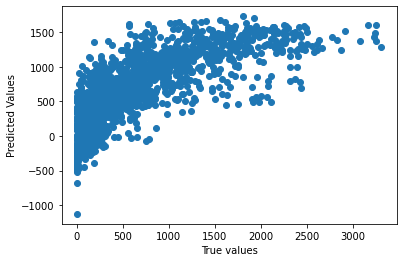

In [59]:
#Analysing true and Predicted Value
plt.scatter(y_test,y_pred)
plt.xlabel('True values'), plt.ylabel('Predicted Values')
plt.show()

In [60]:
#Residual
e_linear = y_test - y_pred

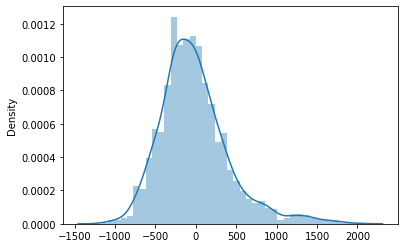

In [61]:
#Residual 
sns.distplot(e_linear)

##<b> Implementing Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X_train)
X_poly_test = poly_regressor.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [63]:
#Predicting training and testing dataset
y_pred_poly_train = lin_reg.predict(X_poly)
y_pred_poly_test = lin_reg.predict(X_poly_test)

##<b> Regression Evaluation metrics for polynomial regression

In [64]:
MSE_poly = mean_squared_error(y_test,y_pred_poly_test)
print('MSE :', MSE_poly)
MAE_poly = mean_absolute_error(y_test,y_pred_poly_test)
print('MAE :', MAE_poly)
RMSE_poly = np.sqrt(MSE_poly)
print('RMSE :', RMSE_poly)

MSE : 138265.5279248724
MAE : 263.6182856011979
RMSE : 371.8407292442188


In [65]:
r2_poly_train = r2_score(y_train,y_pred_poly_train)*100
r2_poly_train

68.5275406491237

In [66]:
r2_poly_test = r2_score(y_test,y_pred_poly_test)*100
r2_poly_test

66.9634252154704

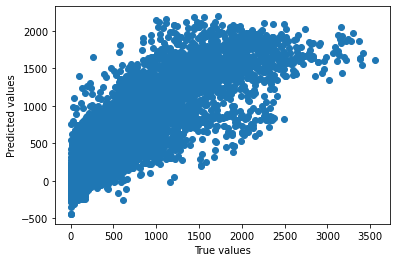

In [67]:
#Analyzing true and predicted values
plt.scatter(y_train, y_pred_poly_train)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

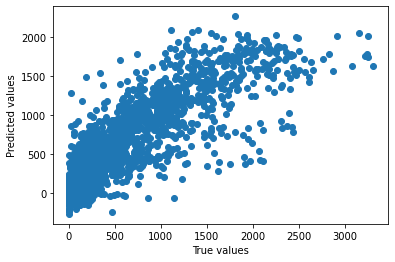

In [68]:
plt.scatter(y_test,y_pred_poly_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

In [69]:
e_poly = y_test - y_pred_poly_test

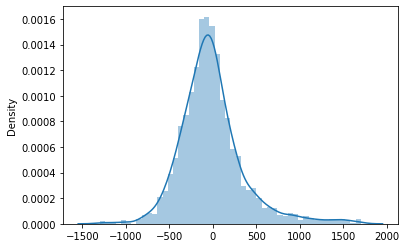

In [70]:
#Residual analysis
sns.distplot(e_poly)
plt.show()

##<b> Random Forest Regressor Model

In [71]:
rand = RandomForestRegressor(n_estimators=100, random_state = 0)
rand.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [72]:
#prdicting on training dataset
y_reg_pred = rand.predict(X_train)


In [73]:
#predicting on test dataset
y_reg_pred_test = rand.predict(X_test)

##<b> Evaluation metrics for Random Forest Regressor

In [74]:
MSE_rand = mean_squared_error(y_test, y_reg_pred_test)
print('MSE :', MSE_rand)
MAE_rand = mean_absolute_error(y_test, y_reg_pred_test)
print('MAE:', MAE_rand)
RMSE_rand = np.sqrt(MSE_rand)
print('RMSE:', RMSE_rand)

MSE : 54476.5701604452
MAE: 141.89453767123285
RMSE: 233.40216400120457


In [75]:
#R2 score
r2_rand_train = r2_score(y_train,y_reg_pred)*100
r2_rand_train

98.21156502095143

In [76]:
r2_rand_test = r2_score(y_test,y_reg_pred_test)*100
r2_rand_test

86.98360096604765

In [77]:
#Adjusted R2 Score
print('Adjusted R2 Score :', 1 - (1-r2_score(y_test, y_reg_pred_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

Adjusted R2 Score : 0.8690131338594795


<function matplotlib.pyplot.show>

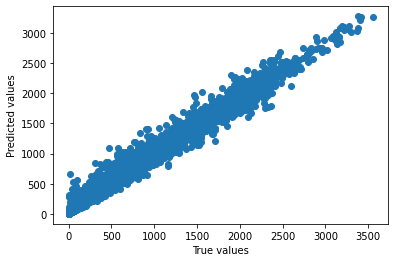

In [78]:
#Analyzing true and predicted values
plt.scatter(y_train,y_reg_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show

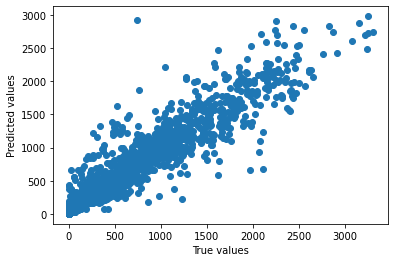

In [79]:
plt.scatter(y_test,y_reg_pred_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

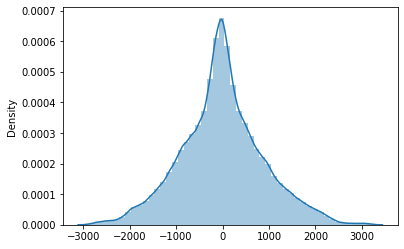

In [80]:
#Residual analysis
e = y_test - y_reg_pred_test
sns.distplot(e)
plt.show()

##<b> Hyperparameter Tuning on Random forest model

In [81]:
#importing gridsearch
from sklearn.model_selection import GridSearchCV

In [82]:
#Assigning the parameters
parameters = {'criterion':['squared_error','absolute_error','poisson'], 'max_features': ['auto','sqrt','log2']}

In [83]:
#Performing the gridsearch using the parameters with cross valudation number as 5
grid = GridSearchCV(rand,parameters,cv=5,scoring = 'neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [84]:
grid.best_params_

{'criterion': 'absolute_error', 'max_features': 'sqrt'}

In [85]:
#We will now use best parameters on our model
rand2 = RandomForestRegressor(n_estimators = 100, random_state = 0, criterion = 'absolute_error', max_features ='sqrt', max_depth =15)

In [86]:
rand2.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      max_features='sqrt', random_state=0)

In [87]:
y_rand = rand2.predict(X_train)
y_rand_test = rand2.predict(X_test)

##<b> Regression evaluation metrics on Random Forest after appying GridSearch

In [88]:
MSE_rand_grid = mean_squared_error(y_test,y_rand_test)
print('MSE:', MSE_rand_grid)
MAE_rand_grid = mean_absolute_error(y_test,y_rand_test)
print('MAE:', MAE_rand_grid)
RMSE_rand_grid = np.sqrt(MSE_rand_grid)
print('RMSE:', RMSE_rand_grid)

MSE: 57404.29040600742
MAE: 150.99388984018265
RMSE: 239.59192475124746


In [89]:
#R2 Score
r2_rand_grid_train = r2_score(y_train,y_rand)
r2_rand_grid_train

0.9425623494075026

In [90]:
r2_rand_grid_test = r2_score(y_test,y_rand_test)*100
r2_rand_grid_test

86.28406399329438

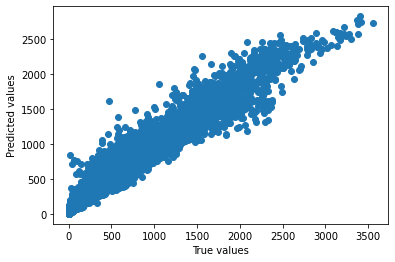

In [91]:
plt.scatter(y_train,y_rand)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

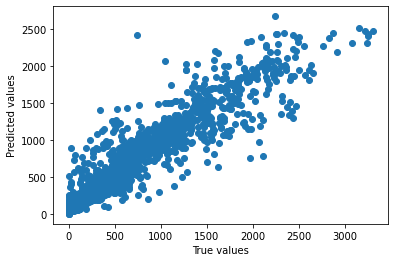

In [92]:
plt.scatter(y_test,y_rand_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

In [93]:
#Residual
e = y_test - y_rand_test

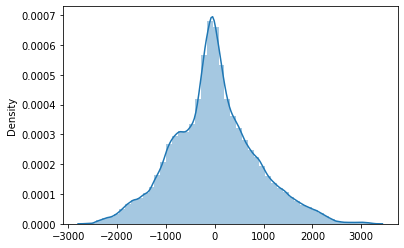

In [94]:
sns.distplot(e)
plt.show()

##<b> Comparisn of Different Evaluation Metrics

###<b>1.Mean Squared Error

<function matplotlib.pyplot.show>

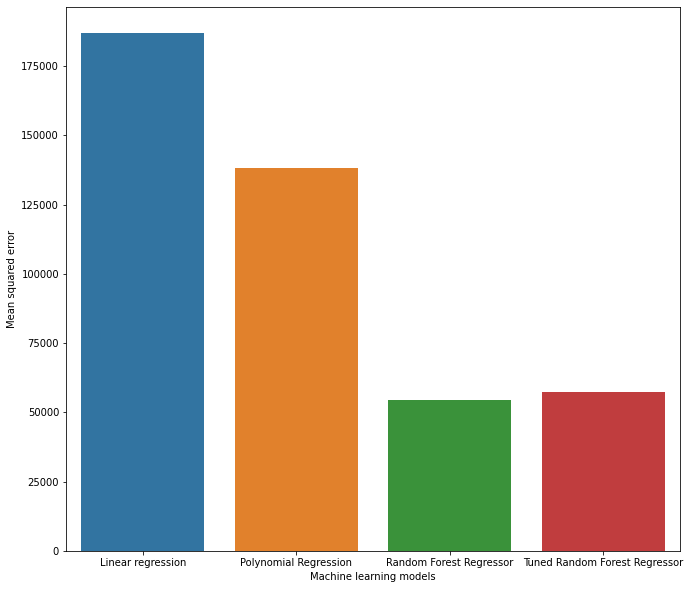

In [95]:
models = ['Linear regression','Polynomial Regression','Random Forest Regressor','Tuned Random Forest Regressor']
score = [MSE, MSE_poly, MSE_rand, MSE_rand_grid]
plt.figure(figsize=(11,10))
plt.xlabel('Machine learning models')
plt.ylabel('Mean squared error')
sns.barplot(x = models, y=score)
plt.show

###<b> Mean Absolute Error

<function matplotlib.pyplot.show>

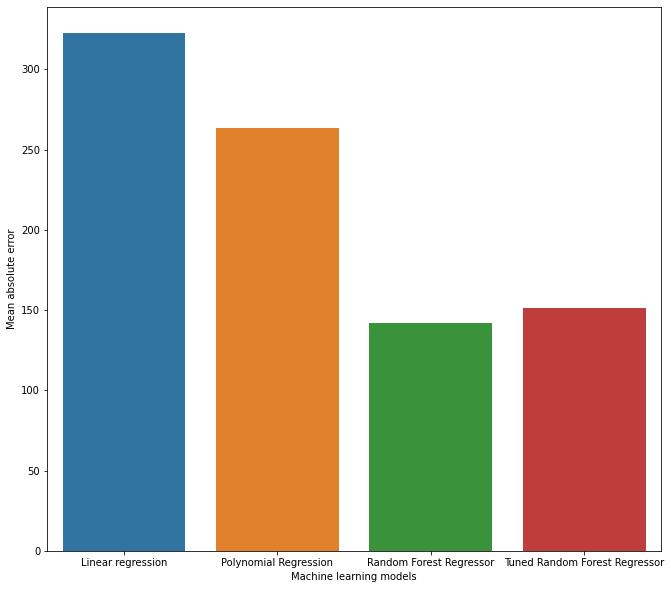

In [96]:
models = ['Linear regression','Polynomial Regression','Random Forest Regressor','Tuned Random Forest Regressor']
score = [MAE, MAE_poly, MAE_rand, MAE_rand_grid]
plt.figure(figsize=(11,10))
plt.xlabel('Machine learning models')
plt.ylabel('Mean absolute error')
sns.barplot(x = models, y=score)
plt.show

###<b> Root Mean Squared Error

<function matplotlib.pyplot.show>

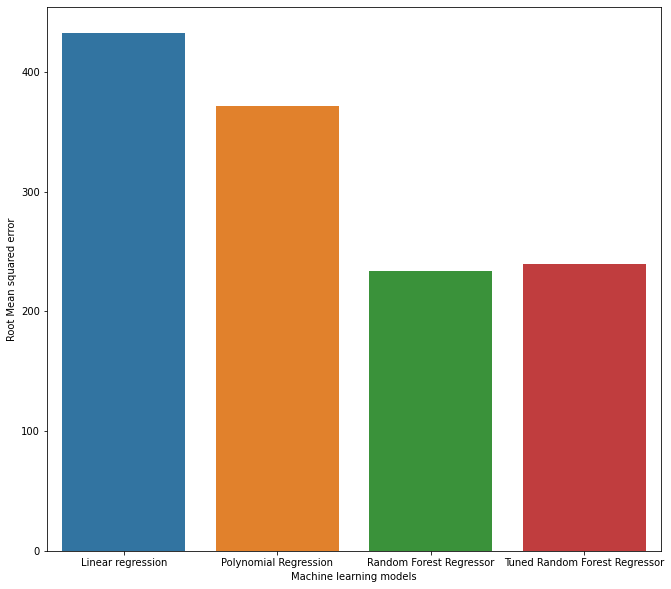

In [97]:
models = ['Linear regression','Polynomial Regression','Random Forest Regressor','Tuned Random Forest Regressor']
score = [RMSE, RMSE_poly, RMSE_rand, RMSE_rand_grid]
plt.figure(figsize=(11,10))
plt.xlabel('Machine learning models')
plt.ylabel('Root Mean squared error')
sns.barplot(x = models, y=score)
plt.show

###<b> R2 Scores

<function matplotlib.pyplot.show>

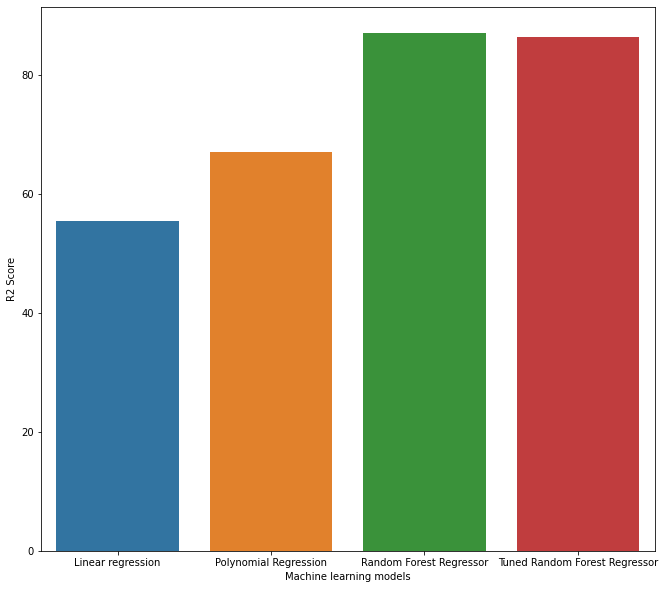

In [98]:
models = ['Linear regression','Polynomial Regression','Random Forest Regressor','Tuned Random Forest Regressor']
score = [r2,r2_poly_test,r2_rand_test,r2_rand_grid_test]
plt.figure(figsize=(11,10))
plt.xlabel('Machine learning models')
plt.ylabel('R2 Score')
sns.barplot(x = models, y=score)
plt.show

#<b> Conclusion

<b>

1. We have used three regression models in our analysis to predict the rented bike count that are Linear Regression, Polynomial Regression and Random Forest Regressor.

2. We have used Hyperparameter tuning on Random forest regressor using GridSearchCV to find the best parameters.

3. Random Forest Regressor is the best model among the three with least errors and highest R2 score.

4. The peak time is 6pm where highest number of bookings are rented.

5. Approximateply between 10 degree celsius to 20 degree celsius the rent booking is peak.

6. Number of bookings are very much higher in Summer season.

7. 'Rainfall' and 'Snowfall' has a huge impact on number of bikes rented.

8. Bike renting is high on Funtional days (ie No holiday).